## Exercise 6.4 - Supervised Machine Learning: Regression

### Contents

#### 1. Import Libraries and Data
#### 2. Data Cleaning and Wrangling
#### 3. Create Scatterplot
#### 4. Hypothesis
#### 5. Regression Testing
#### 6. Bonus Task

### 1. Import Libraries and Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Insure graphs are displayed in the notebook
%matplotlib inline

In [3]:
#Define path
path = r'/Users/anfran/Desktop/Chocolate Rating Project'

In [4]:
#Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_data_clean.csv'), index_col = False)

In [5]:
df.head()

,Row ID,Company,bean_origin,REF,review_date,cocoa_percent,company_location,Rating,bean_type,broad_bean_origin
0,1177,Neuhaus (Callebaut),Sao Tome,15,2006,0.75,Belgium,2.75,Forastero,Sao Tome
1,1292,Pierre Marcolini,"Porcelana, Tabasco, Limited Ed.",81,2006,0.72,Belgium,4.00,Criollo,Mexico
2,1237,Original Hawaiin Chocolate Factory,"Hawai'i, Kona Estate Grown",24,2006,0.60,United States,3.00,Unknown,Hawaii
3,1178,Neuhaus (Callebaut),Ocumare,24,2006,0.71,Belgium,3.00,Criollo,Venezuela
4,1176,Neuhaus (Callebaut),West Africa,15,2006,0.73,Belgium,2.00,Forastero,West Africa


In [6]:
df.shape

(1795, 10)

### 2. Data Cleaning and Wrangling

In [7]:
df.columns

Index(['Row ID', 'Company', 'bean_origin', 'REF', 'review_date',
       'cocoa_percent', 'company_location', 'Rating', 'bean_type',
       'broad_bean_origin'],
      dtype='object')

In [8]:
#Check for missing values
df.isnull().sum()

Row ID               0
Company              0
bean_origin          0
REF                  0
review_date          0
cocoa_percent        0
company_location     0
Rating               0
bean_type            0
broad_bean_origin    0
dtype: int64

No missing values found

In [9]:
#Check for duplicates
dups = df.duplicated()

In [10]:
dups.shape

(1795,)

No duplicates found

/Users/anfran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

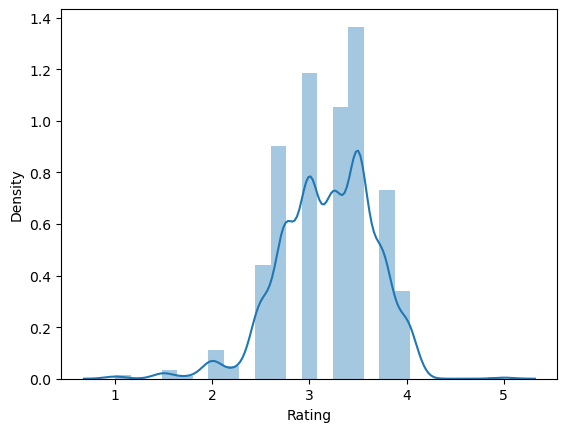

In [11]:
#Check for extreme values
sns.distplot(df['Rating'], bins=25)

No extreme values found

In [12]:
#Check basic statistics of 'Rating'
df['Rating'].mean()

3.185933147632312

In [13]:
df['Rating'].median()

3.25

In [14]:
df['Rating'].min()

1.0

In [15]:
df['Rating'].max()

5.0

In [16]:
df['Rating'].describe()

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

### 3. Create Scatterplot

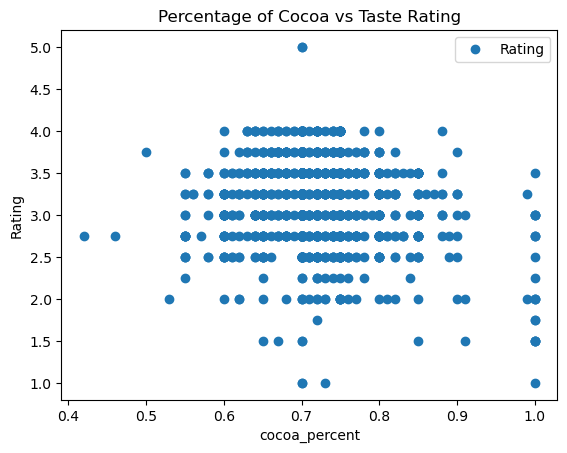

In [17]:
#Create scatterplot for 'cocoa_percent' and 'Rating'
df.plot(x = 'cocoa_percent', y='Rating',style='o') 
plt.title('Percentage of Cocoa vs Taste Rating')  
plt.xlabel('cocoa_percent')  
plt.ylabel('Rating')  
plt.show()

In [21]:
#Reshape the variables in NumPy
X = df['cocoa_percent'].values.reshape(-1,1)
Y = df['Rating'].values.reshape(-1,1)

In [22]:
X

array([[0.75],
       [0.72],
       [0.6 ],
       ...,
       [0.7 ],
       [0.77],
       [0.7 ]])

In [23]:
Y

array([[2.75],
       [4.  ],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.5 ]])

In [24]:
#Split data into training set and test set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### 4. Hypothesis

#### If the percentage of cocoa in the chocolate changes, the overall taste rating of the chocolate does not change. 

### 5. Regression Testing

In [25]:
#Create a regression object
regression = LinearRegression()

In [26]:
#Apply the regression object to the training set
regression.fit(X_train, Y_train)

LinearRegression()

In [27]:
#Use regression model to predict the value of Y using X
Y_predicted = regression.predict(X_test)

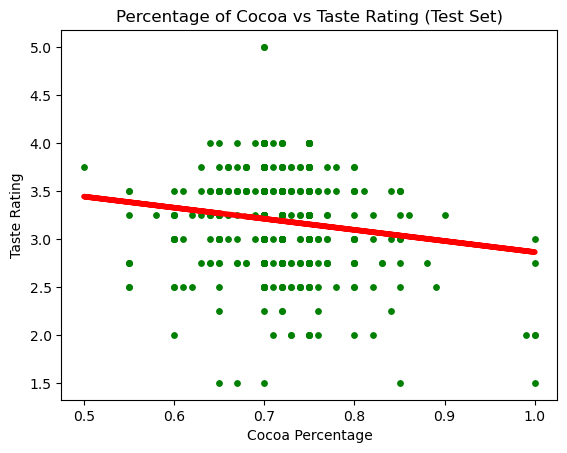

In [28]:
#Create plot that shows the regression line from the model
plot_test = plt
plot_test.scatter(X_test, Y_test, color='green', s = 15)
plot_test.plot(X_test, Y_predicted, color='red', linewidth =4)
plot_test.title('Percentage of Cocoa vs Taste Rating (Test Set)')
plot_test.xlabel('Cocoa Percentage')
plot_test.ylabel('Taste Rating')
plot_test.show()

There is a slight negative slope, so there is a slight negative relationship between the percentage of cocoa in the chocolate and the overall test rating. I will check the slope, MSE, and the R2 score for further information.

In [30]:
#Check the slope, MSE, and the R2 score
rmse = mean_squared_error(Y_test, Y_predicted)
r2 = r2_score(Y_test, Y_predicted)
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.15640476]]
Mean squared error:  0.23997239755854072
R2 score:  0.030927401085529937


In [31]:
Y_predicted

array([[3.23290298],
       [3.20977489],
       [3.20977489],
       [3.20977489],
       [3.20977489],
       [3.15195465],
       [3.03631417],
       [3.04787822],
       [3.26759513],
       [3.15195465],
       [3.15195465],
       [3.20977489],
       [3.20977489],
       [3.07100632],
       [3.09413441],
       [3.20977489],
       [3.15195465],
       [3.20977489],
       [3.20977489],
       [3.20977489],
       [3.20977489],
       [3.20977489],
       [3.17508275],
       [3.12882656],
       [3.19821084],
       [3.12882656],
       [3.20977489],
       [3.26759513],
       [3.18664679],
       [3.20977489],
       [3.18664679],
       [3.15195465],
       [3.29072322],
       [3.15195465],
       [3.15195465],
       [3.15195465],
       [3.20977489],
       [3.15195465],
       [3.23290298],
       [3.18664679],
       [3.20977489],
       [3.12882656],
       [3.20977489],
       [3.27915917],
       [3.18664679],
       [3.18664679],
       [3.20977489],
       [3.244

In [32]:
#Create a dataframe showing the actual results with the predicted results
data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,3.50,3.232903
1,3.25,3.209775
2,3.50,3.209775
3,3.50,3.209775
4,3.00,3.209775
5,4.00,3.151955
6,2.75,3.036314
7,2.25,3.047878
8,3.25,3.267595
9,2.75,3.151955


Even though the predicted results are fairly close to the actual results, the R2 score is 0.03, meaning an extremely low correlation, proving my hypothesis. 

In [33]:
#Predict the results
Y_predicted_train = regression.predict(X_train)

In [34]:
rmse = mean_squared_error(Y_train, Y_predicted_train)
r2 = r2_score(Y_train, Y_predicted_train)

In [35]:
#Check the slope, MSE, and the R2 score
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.15640476]]
Mean squared error:  0.21463868841235828
R2 score:  0.024996130220139023


This produced an even lower R2 score than before. There are obviously more factors at play in influencing the taste of the chocolate that cocoa percentage alone. 

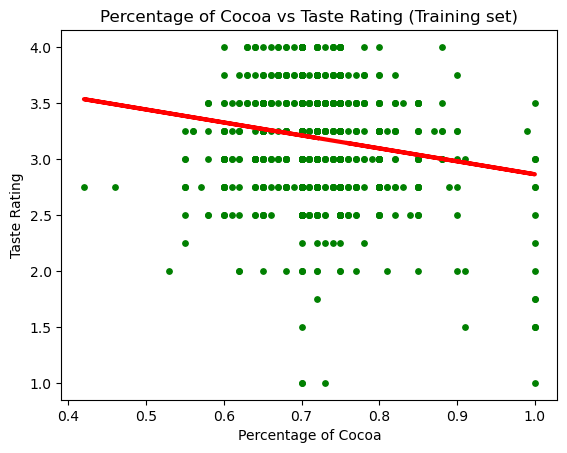

In [36]:
#Visualize the results
plot_test = plt
plot_test.scatter(X_train, Y_train, color='green', s = 15)
plot_test.plot(X_train, Y_predicted_train, color='red', linewidth =3)
plot_test.title('Percentage of Cocoa vs Taste Rating (Training set)')
plot_test.xlabel('Percentage of Cocoa')
plot_test.ylabel('Taste Rating')
plot_test.show()

I'm not sure how bias could be present. I do not believe that is an issue here. 

### 6. Bonus Task

#### I know that this is not required for the task. However, these steps were contained in the sample notebook for the exercise, so I wanted to attempt them for practice and feedback. 

In [39]:
#Clean values less than 2.0
df_test = df[df['Rating'] >=2.0] 

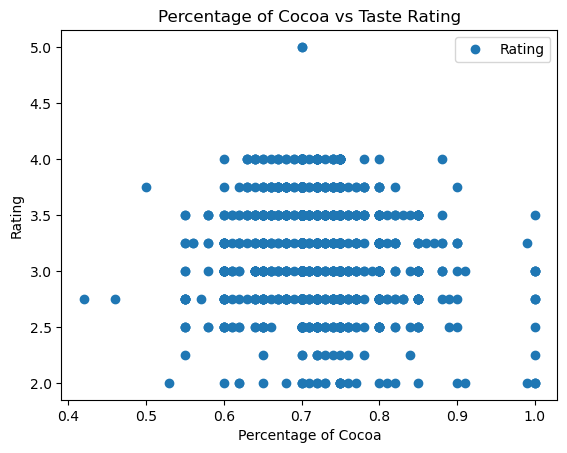

In [40]:
#Visualize the scatterplot without values lower than 2.0
df_test.plot(x = 'cocoa_percent', y='Rating', style='o')  
plt.title('Percentage of Cocoa vs Taste Rating')  
plt.xlabel('Percentage of Cocoa')  
plt.ylabel('Rating')  
plt.show()

In [41]:
#Reshape
X_2 = df_test['cocoa_percent'].values.reshape(-1,1)
Y_2 = df_test['Rating'].values.reshape(-1,1)

In [43]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.3, random_state=0)

In [44]:
#Run and fit the regression model
regression = LinearRegression()  
regression.fit(X_train_2, Y_train_2)

LinearRegression()

In [45]:
#Run prediction
Y_predicted_2 = regression.predict(X_test_2)

In [47]:
rmse = mean_squared_error(Y_test_2, Y_predicted_2)
r2 = r2_score(Y_test_2, Y_predicted_2)
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.84601871]]
Mean squared error:  0.20941205525803047
R2 score:  0.007573580144709879


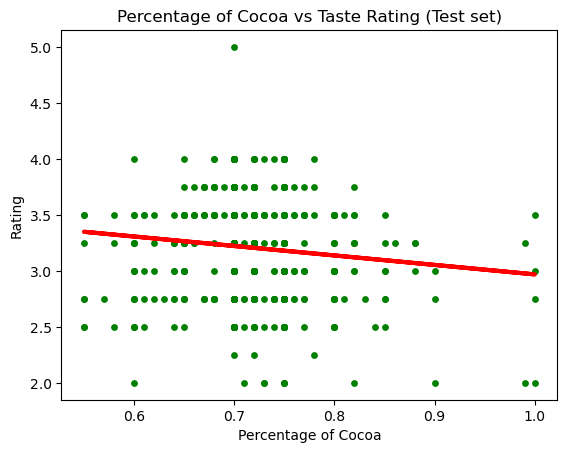

In [48]:
# Visualize the results
plot_test = plt
plot_test.scatter(X_test_2, Y_test_2, color='green', s = 15)
plot_test.plot(X_test_2, Y_predicted_2, color='red', linewidth =3)
plot_test.title('Percentage of Cocoa vs Taste Rating (Test set)')
plot_test.xlabel('Percentage of Cocoa')
plot_test.ylabel('Rating')
plot_test.show()

In [49]:
#Create a dataframe showing the actual results with the predicted results
data = pd.DataFrame({'Actual': Y_test_2.flatten(), 'Predicted': Y_predicted_2.flatten()})
data.head(25)

,Actual,Predicted
0,3.25,3.222752
1,3.25,3.188911
2,3.50,3.222752
3,3.00,3.222752
4,3.25,3.222752
5,3.25,3.222752
6,2.50,3.180451
7,3.00,3.205832
8,3.75,3.205832
9,3.25,3.222752


Considering the R2 score is extremely low, these results are worse than the original. 